In [4]:

import pandas as pd 
import numpy as np
from bs4 import BeautifulSoup
from sklearn.cluster import KMeans
import requests
from geopy.geocoders import Nominatim
from IPython.display import Image, display_html
from IPython.core.display import HTML 
from pandas.io.json import json_normalize
import folium

In [22]:
source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup=BeautifulSoup(source,'lxml')
tab = str(soup.table)

In [36]:
dataset = pd.read_html(tab)[0]
dataset

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,NaN
176,M6Z,Not assigned,NaN
177,M7Z,Not assigned,NaN
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


In [38]:
dataset = dataset[dataset['Borough'] != 'Not assigned'].reset_index(drop=True)
dataset

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,Business reply mail Processing Centre
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [31]:
grouped_dataset = dataset.groupby(['Postal Code', 'Borough']).agg(', '.join).reset_index()
grouped_dataset

,Postal Code,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
...,...,...,...
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ..."
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest..."


In [43]:
grouped_dataset.shape

(103, 3)

In [45]:
coordinate = pd.read_csv('https://cocl.us/Geospatial_data')
coordinate.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [46]:
merged_dataset = pd.merge(grouped_dataset, coordinate, on='Postal Code')
merged_dataset

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437


In [47]:
toronto_dataset = merged_dataset[merged_dataset['Borough'].str.contains('Toronto',regex=False)].reset_index(drop=True)
toronto_dataset

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,M4M,East Toronto,Studio District,43.659526,-79.340923
4,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
5,M4P,Central Toronto,Davisville North,43.712751,-79.390197
6,M4R,Central Toronto,North Toronto West,43.715383,-79.405678
7,M4S,Central Toronto,Davisville,43.704324,-79.388790
8,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
9,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049


In [63]:
map_toronto = folium.Map(location=[43.651070,-79.347015],zoom_start=10)

for lat,lng,borough,neighborhood in zip(toronto_dataset['Latitude'],toronto_dataset['Longitude'],toronto_dataset['Borough'],toronto_dataset['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color='blue',
    fill=True,
    fill_color='#3186cc',
    fill_opacity=0.7,
    parse_html=False).add_to(map_toronto)
map_toronto

In [50]:
X = toronto_dataset[['Latitude', 'Longitude']]


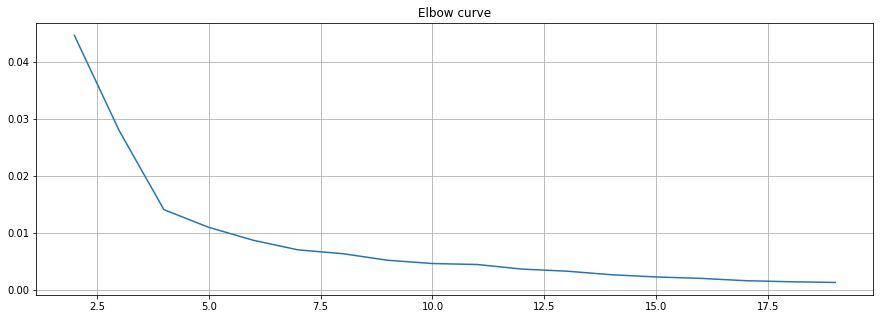

In [53]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt


distorsions = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [60]:
k=5
kmeans = KMeans(n_clusters = k,random_state=0).fit(X)
final_dataset = pd.DataFrame()
final_dataset['cluster'] = kmeans.labels_

final_dataset = pd.concat([final_dataset, toronto_dataset], axis = 1)
final_dataset

,cluster,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,0,M4E,East Toronto,The Beaches,43.676357,-79.293031
1,0,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
2,0,M4L,East Toronto,"India Bazaar, The Beaches West",43.668999,-79.315572
3,0,M4M,East Toronto,Studio District,43.659526,-79.340923
4,1,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
5,1,M4P,Central Toronto,Davisville North,43.712751,-79.390197
6,1,M4R,Central Toronto,North Toronto West,43.715383,-79.405678
7,1,M4S,Central Toronto,Davisville,43.704324,-79.388790
8,1,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
9,1,M4V,Central Toronto,"Summerhill West, Rathnelly, South Hill, Forest...",43.686412,-79.400049


In [62]:

map_clusters = folium.Map(location=[43.651070,-79.347015],zoom_start=10)


markers_colors = ['red', 'yellow', 'green', 'blue', 'black']
for lat, lon, neighbourhood, cluster in zip(final_dataset['Latitude'], final_dataset['Longitude'], final_dataset['Neighborhood'], final_dataset['cluster']):
    label = folium.Popup(' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=markers_colors[cluster],
        fill=True,
        fill_color=markers_colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters